In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import openweathermapy.core as owm
#import os
#import csv
import seaborn as sns

import datetime as dt
from  scipy.stats import skew, kurtosis, shapiro
from statsmodels.tsa.seasonal import seasonal_decompose

from statsmodels.tsa.stattools import adfuller, kpss

from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
file = "../../Data/CSV_Files/Gas_Demand_Tot.csv"
df_demand = pd.read_csv(file, encoding='utf-8')
df_demand = df_demand.drop(['Unnamed: 0'], axis=1)
df_demand["Date"] = pd.to_datetime(df_demand["Date"])
df_demand = df_demand.set_index("Date")
df_demand

,Area,Consumption(Bscf)
Date,,
2019-04-01,U.S.,2182.901
2019-03-01,U.S.,2882.561
2019-02-01,U.S.,2983.892
2019-01-01,U.S.,3379.295
2018-12-01,U.S.,2958.554
2018-11-01,U.S.,2687.995
2018-10-01,U.S.,2276.313
2018-09-01,U.S.,2158.549
2018-08-01,U.S.,2311.370


In [4]:
file = "../../Data/CSV_Files/Gas_Price_Elec.csv"
df_price = pd.read_csv(file, encoding='utf-8')
df_price = df_price.drop(['Unnamed: 0'], axis=1)
df_price["Date"] = pd.to_datetime(df_price["Date"])
df_price = df_price.set_index("Date")
df_price.loc[df_price["Area"]=="U.S."]

,Area,Price
Date,,
2019-04-01,U.S.,2.98
2019-03-01,U.S.,3.59
2019-02-01,U.S.,3.79
2019-01-01,U.S.,4.16
2018-12-01,U.S.,4.89
2018-11-01,U.S.,4.32
2018-10-01,U.S.,3.50
2018-09-01,U.S.,3.21
2018-08-01,U.S.,3.39


In [5]:
# df = df_demand.merge(df_price, how='outer', left_index=True, right_index=True)

C:\Users\Asterion\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


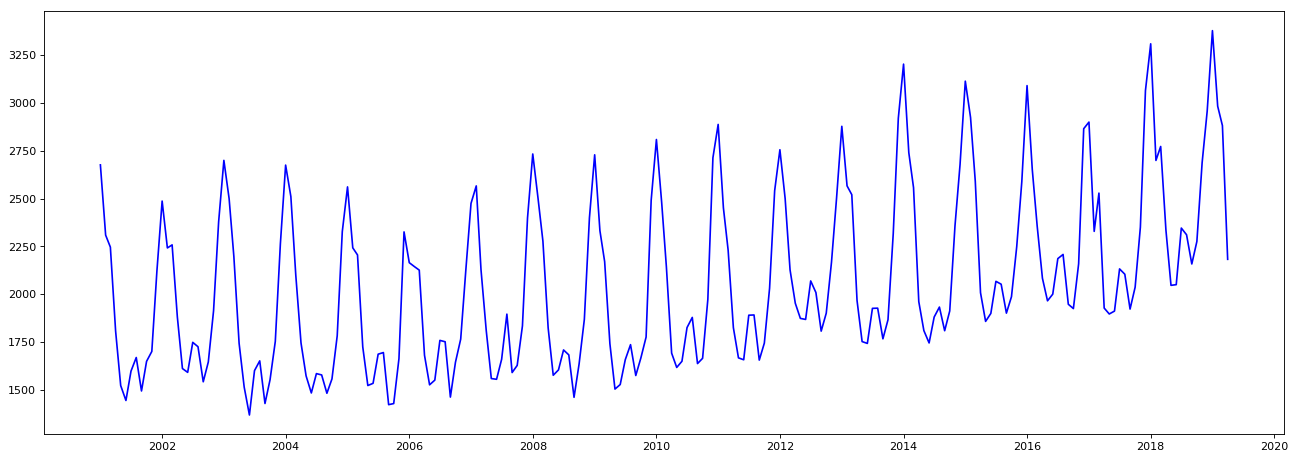

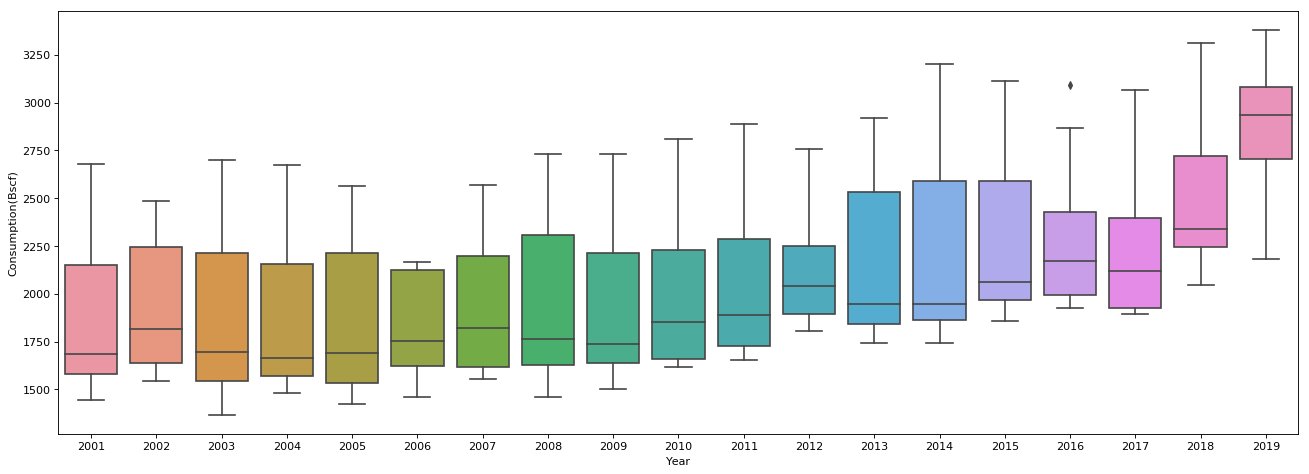

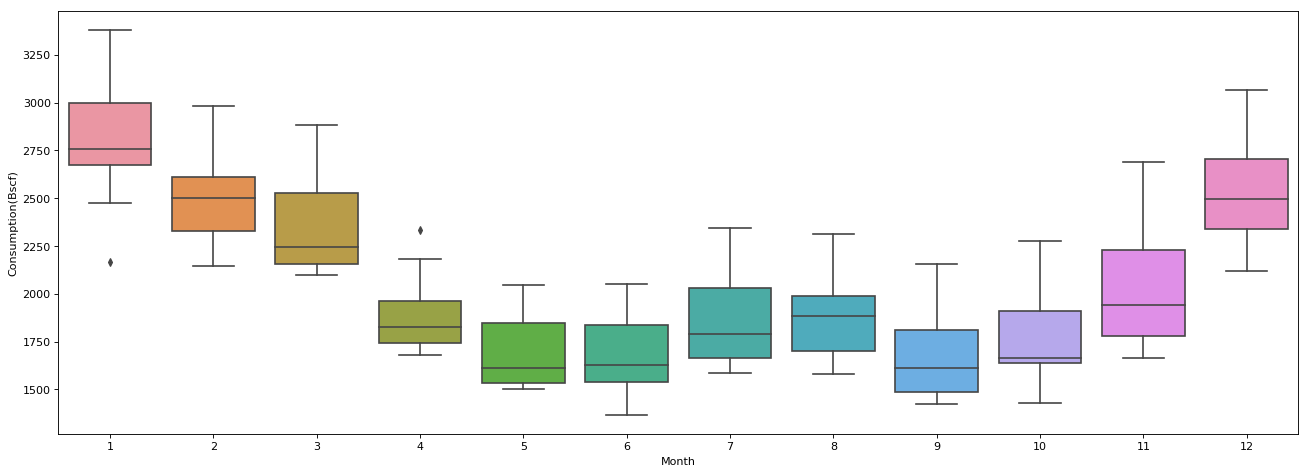

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(20,7), dpi= 80)
plt.plot(df_demand.index,df_demand["Consumption(Bscf)"],c="b")

df_demand["Year"] = df_demand.index.year
fig, axes = plt.subplots(1, 1, figsize=(20,7), dpi= 80)
sns.boxplot(x='Year', y="Consumption(Bscf)", data=df_demand)

df_demand["Month"] = df_demand.index.month
fig, axes = plt.subplots(1, 1, figsize=(20,7), dpi= 80)
sns.boxplot(x='Month', y="Consumption(Bscf)", data=df_demand)

In [7]:
mean = df_demand["Consumption(Bscf)"].mean()
std = df_demand["Consumption(Bscf)"].std()
skew = df_demand["Consumption(Bscf)"].skew()
ex_kurt = df_demand["Consumption(Bscf)"].kurtosis()

print(f"Mean: {mean} \n Std: {std} \n Skew: {skew} \n Kurtosis: {ex_kurt+3}")

Mean: 2059.0168818181814 
 Std: 442.99393249611154 
 Skew: 0.7118853715415384 
 Kurtosis: 2.7540662805723426


- Negative Skewness: Data distribution is not completelly simetric and has a left tail
- Kurtosis below 3: It means that tails are slightly thinner than in a Normal distribution. It is said that the distribution is platykurtic and the chance of finding extreme values is lower than in a normal distribution.

In [8]:
def shapiro_test(data, alpha=0.05):
    stat, pval = shapiro(data)
    print("H0: Data was drawn from a Normal Ditribution")
    if (pval<alpha):
        print("pval {} is lower than significance level: {}, therefore null hypothesis is rejected".format(pval, alpha))
    else:
        print("pval {} is higher than significance level: {}, therefore null hypothesis cannot be rejected".format(pval, alpha))
        
shapiro_test(df_demand["Consumption(Bscf)"], alpha=0.05)

H0: Data was drawn from a Normal Ditribution
pval 1.2110002955978416e-07 is lower than significance level: 0.05, therefore null hypothesis is rejected


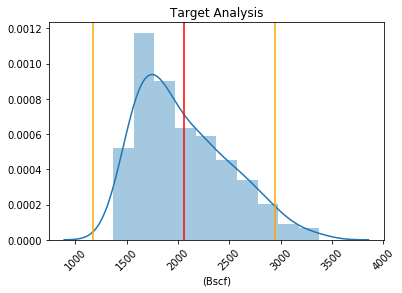

In [9]:
sns.distplot(df_demand["Consumption(Bscf)"])
plt.title("Target Analysis")
plt.xticks(rotation=45)
plt.xlabel("(Bscf)")
plt.axvline(x=mean, color='r', linestyle='-', label="\mu: {0:.2f}%".format(mean))
plt.axvline(x=mean+2*std, color='orange', linestyle='-')
plt.axvline(x=mean-2*std, color='orange', linestyle='-')
plt.show()

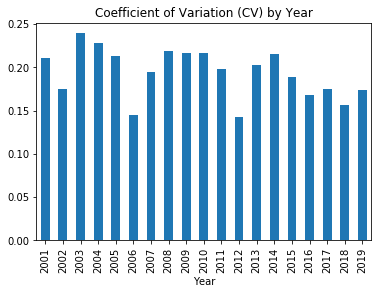

In [10]:
df_demand.groupby("Year")["Consumption(Bscf)"].std().divide(df_demand.groupby("Year")["Consumption(Bscf)"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by Year")
plt.show()

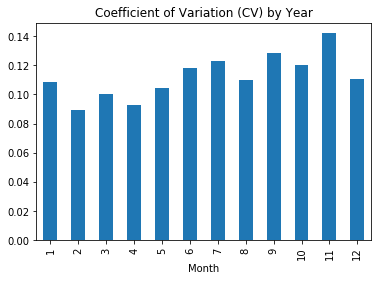

In [11]:
df_demand.groupby("Month")["Consumption(Bscf)"].std().divide(df_demand.groupby("Month")["Consumption(Bscf)"].mean()).plot(kind="bar")
plt.title("Coefficient of Variation (CV) by Year")
plt.show()

# Feature Engineering

The challenge now is to create some features in a very automated way that can deal with seasonality, trend and changes in volatility. The most basic strategy is to use lagged features and rolling window stats, but consider other advanced techniques for further research:
- Momentum and Mean reversion, like RSI in financial markets (https://en.wikipedia.org/wiki/Relative_strength_index)
- Sequence minning

Data is standardized in order to allow application of models that are sensitive to scale, like neural networks or svm. Remember that distribution shape is maintained, it only changes first and second momentum (mean and standard deviation)

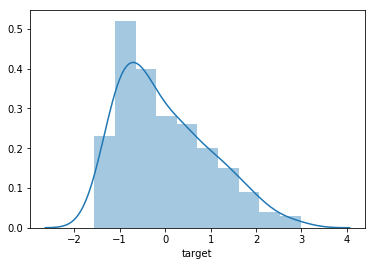

In [12]:
df_demand["target"] = df_demand["Consumption(Bscf)"].add(-mean).div(std)
sns.distplot(df_demand["target"])
plt.show()

In [13]:
features = []
corr_features=[]
targets = []
tau = 4 #forecasting periods

for t in range(1, tau+1):
    df_demand["target_t" + str(t)] = df_demand["target"].shift(-t)
    targets.append("target_t" + str(t))

In [14]:
df_demand

,Area,Consumption(Bscf),Year,Month,target,target_t1,target_t2,target_t3,target_t4
Date,,,,,,,,,
2019-04-01,U.S.,2182.901,2019,4,0.279652,1.859042,2.087783,2.980353,2.030586
2019-03-01,U.S.,2882.561,2019,3,1.859042,2.087783,2.980353,2.030586,1.419835
2019-02-01,U.S.,2983.892,2019,2,2.087783,2.980353,2.030586,1.419835,0.490517
2019-01-01,U.S.,3379.295,2019,1,2.980353,2.030586,1.419835,0.490517,0.224681
2018-12-01,U.S.,2958.554,2018,12,2.030586,1.419835,0.490517,0.224681,0.569654
2018-11-01,U.S.,2687.995,2018,11,1.419835,0.490517,0.224681,0.569654,0.648759
2018-10-01,U.S.,2276.313,2018,10,0.490517,0.224681,0.569654,0.648759,-0.019582
2018-09-01,U.S.,2158.549,2018,9,0.224681,0.569654,0.648759,-0.019582,-0.027655
2018-08-01,U.S.,2311.370,2018,8,0.569654,0.648759,-0.019582,-0.027655,0.625752


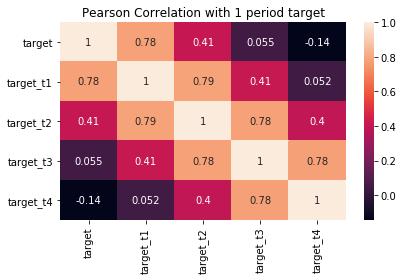

In [15]:
corr_features = ["target","target_t1","target_t2","target_t3","target_t4"]
corr = df_demand[corr_features].corr()

# Plot heatmap of correlation matrix
sns.heatmap(corr, annot=True)
plt.title("Pearson Correlation with 1 period target")
plt.yticks(rotation=0); plt.xticks(rotation=90)  # fix ticklabel directions
plt.tight_layout()  # fits plot area to the plot, "tightly"
plt.show()  # show the plot

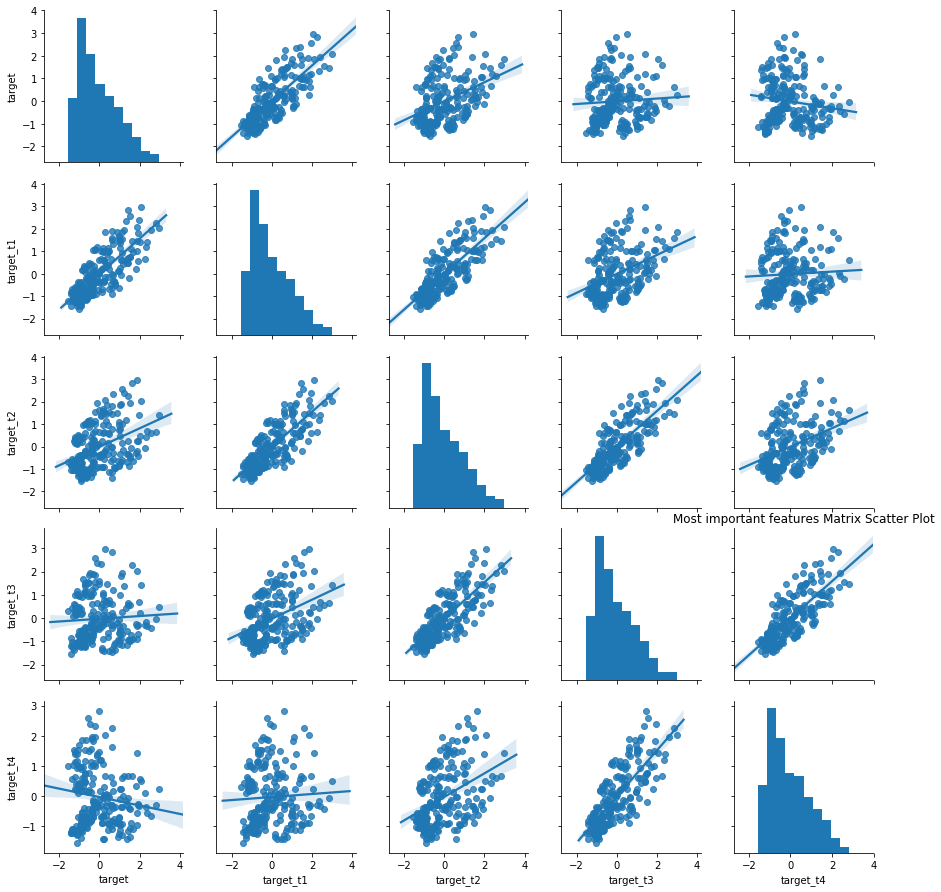

In [16]:
sns.pairplot(data=df_demand[corr_features].dropna(), kind="reg")
plt.title("Most important features Matrix Scatter Plot")
plt.show()

Time series decomposition

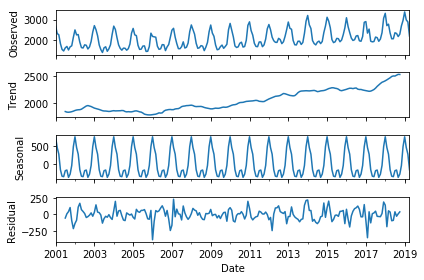

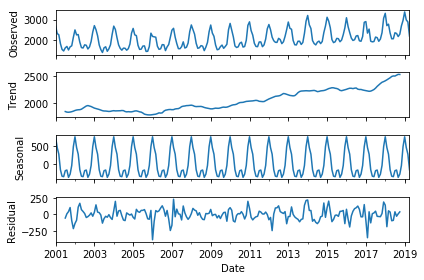

In [17]:
decomposition = seasonal_decompose(df_demand["Consumption(Bscf)"], model = "additive")
decomposition.plot()

In [18]:
trend = pd.DataFrame(decomposition.trend)
trend = trend.dropna()
seasonal = pd.DataFrame(decomposition.seasonal)
seasonal = seasonal.dropna()
residual = pd.DataFrame(decomposition.resid)
residual = residual.dropna()

Testing Stationarity

In [19]:
# ADF Test

def ADF_test(data, alpha=0.05):
    result = adfuller(data, autolag='AIC')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')

    if result[1] <= 0.05:
        print("The null hypothesis is that the time series is non-stationary. Since p <= 0.05, we reject the null hypotesis")
    else:
        print("The null hypothesis is that the time series is non-stationary. Since p > 0.05, we CAN NOT REJECT the null hypotesis")

    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    

# KPSS Test
def KPSS_test(data, alpha=0.05):
    result = kpss(data, regression='c')
    print('\nKPSS Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

    if result[1] <= 0.05:
        print("The null hypothesis is that the time series is stationary. Since p <= 0.05, we reject the null hypotesis")
    else:
        print("The null hypothesis is that the time series is stationary. Since p > 0.05, we CAN NOT REJECT the null hypotesis")

    for key, value in result[3].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    

print("===============================")
data = df_demand["Consumption(Bscf)"]
ADF_test(data, alpha=0.05)
KPSS_test(data, alpha=0.05)
print("===============================")
data = trend["Consumption(Bscf)"] + residual["Consumption(Bscf)"]
ADF_test(data, alpha=0.05)
KPSS_test(data, alpha=0.05)
print("===============================")
data = residual["Consumption(Bscf)"]
ADF_test(data, alpha=0.05)
KPSS_test(data, alpha=0.05)

ADF Statistic: -2.166909593158075
p-value: 0.2184737557586166
The null hypothesis is that the time series is non-stationary. Since p > 0.05, we CAN NOT REJECT the null hypotesis
Critial Values:
   1%, -3.4626576734812318
Critial Values:
   5%, -2.8757444215841326
Critial Values:
   10%, -2.5743412314098753

KPSS Statistic: 1.167840
p-value: 0.010000
The null hypothesis is that the time series is stationary. Since p <= 0.05, we reject the null hypotesis
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739
ADF Statistic: -1.9483878467413003
p-value: 0.3096512229321028
The null hypothesis is that the time series is non-stationary. Since p > 0.05, we CAN NOT REJECT the null hypotesis
Critial Values:
   1%, -3.4648754262570978
Critial Values:
   5%, -2.876714157488788
Critial Values:
   10%, -2.574858699001736

KPSS Statistic: 1.309440
p-value: 0.010000
The null hypothesis is that the time series is stationary. Since p <= 0.0

C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1276: InterpolationWarning: p-value is smaller than the indicated p-value
  warn("p-value is smaller than the indicated p-value", InterpolationWarning)
C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1278: InterpolationWarning: p-value is greater than the indicated p-value
  warn("p-value is greater than the indicated p-value", InterpolationWarning)


Autocorrelation and Partial Autocorrelation

If a series is significantly autocorrelated, that means, the previous values of the series (lags) may be helpful in predicting the current value.

Partial Autocorrelation also conveys similar information but it conveys the pure correlation of a series and its lag, excluding the correlation contributions from the intermediate lags.

C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


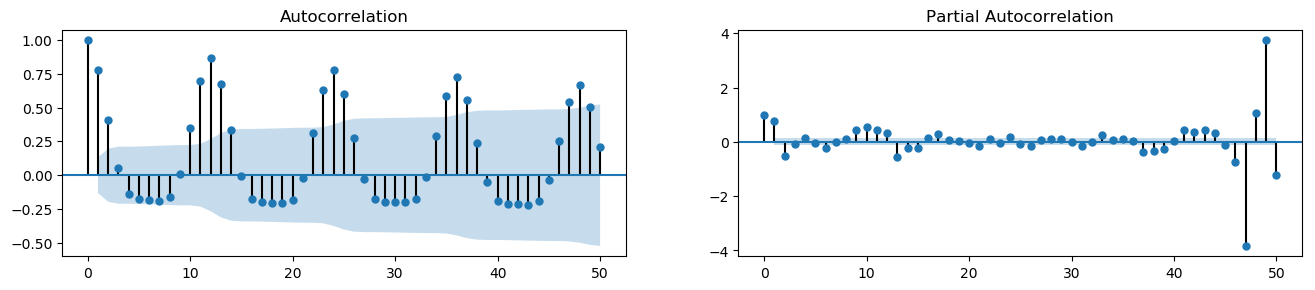

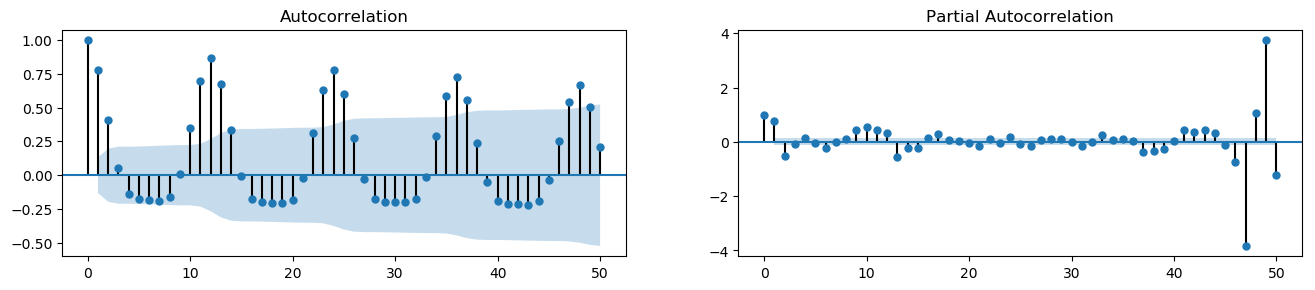

In [20]:
list_consump = df_demand["Consumption(Bscf)"].tolist()
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(list_consump, lags=50, ax=axes[0])
plot_pacf(list_consump, lags=50, ax=axes[1])

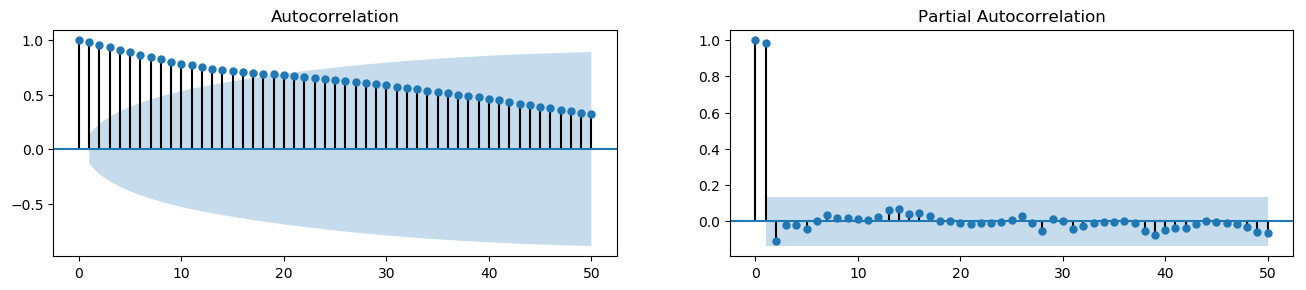

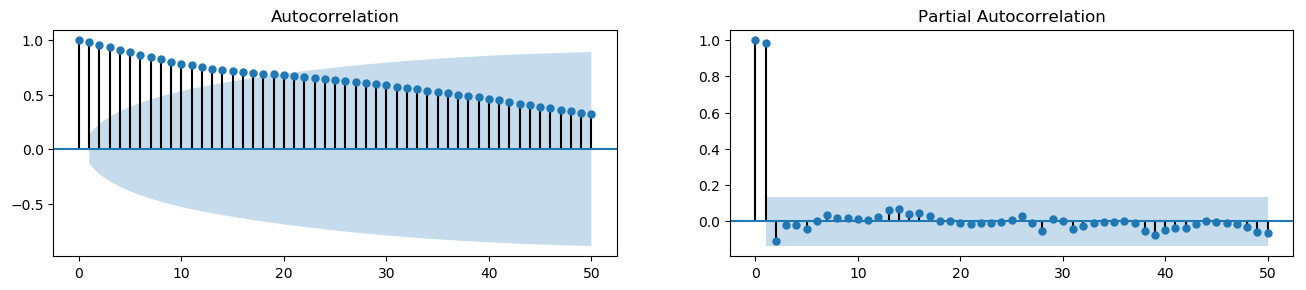

In [21]:
list_consump = trend["Consumption(Bscf)"].tolist()
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(list_consump, lags=50, ax=axes[0])
plot_pacf(list_consump, lags=50, ax=axes[1])

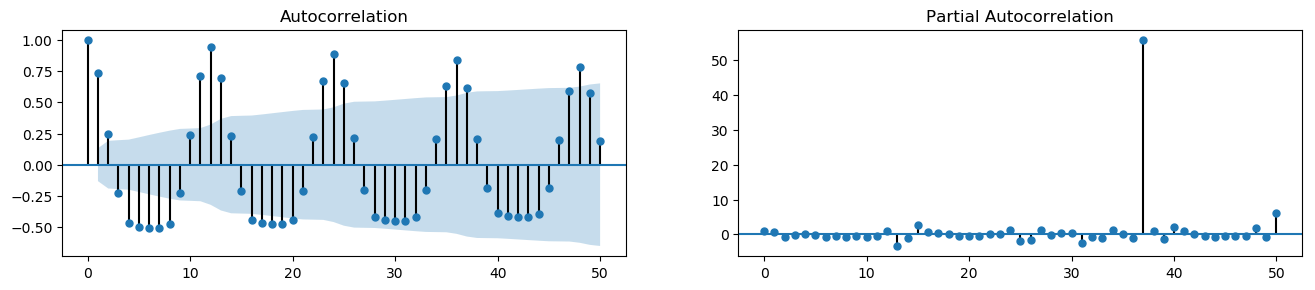

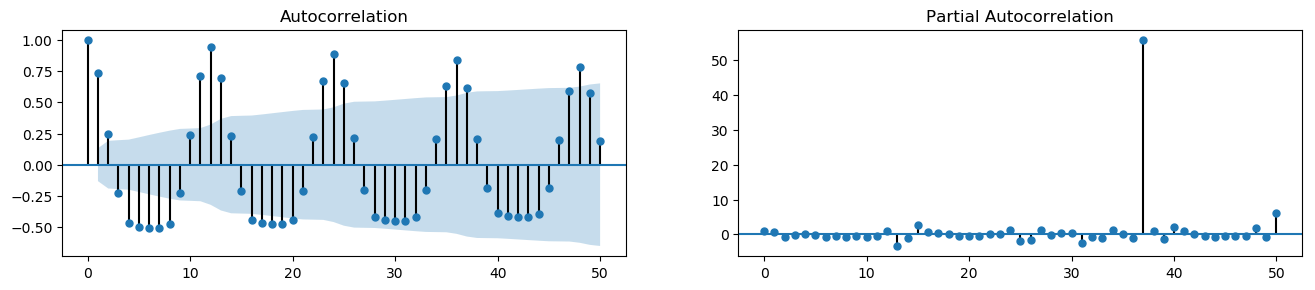

In [22]:
list_consump = seasonal["Consumption(Bscf)"].tolist()
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(list_consump, lags=50, ax=axes[0])
plot_pacf(list_consump, lags=50, ax=axes[1])

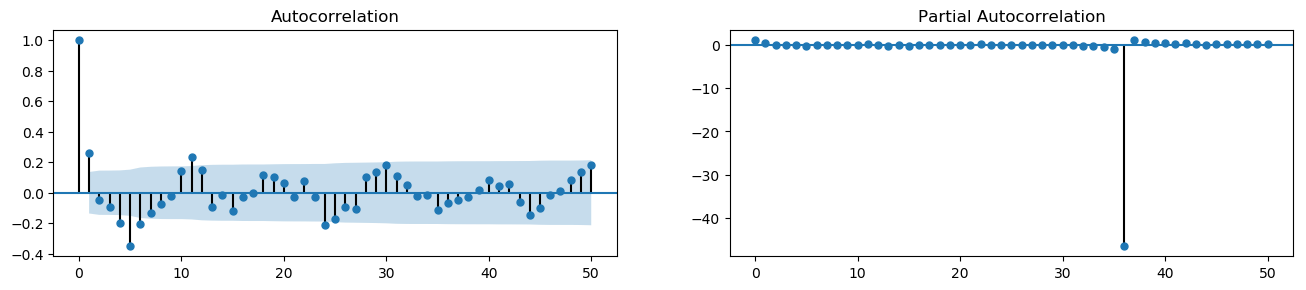

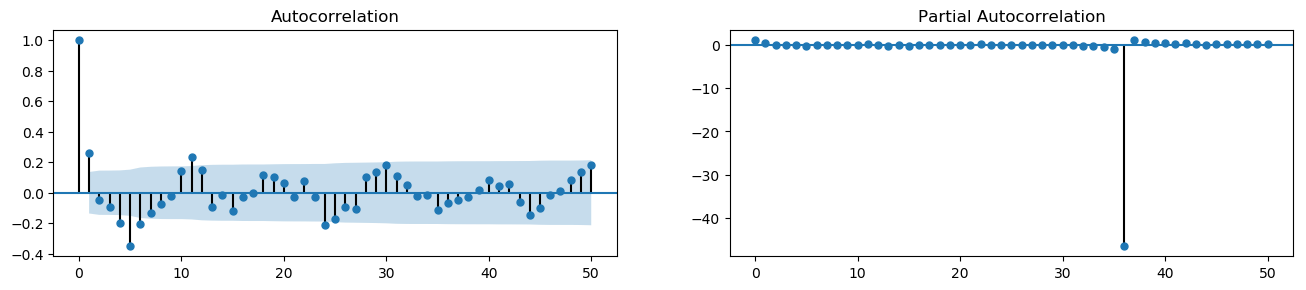

In [23]:
list_consump = residual["Consumption(Bscf)"].tolist()
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(list_consump, lags=50, ax=axes[0])
plot_pacf(list_consump, lags=50, ax=axes[1])

In [24]:
from pmdarima.arima.utils import ndiffs

data = df_demand["Consumption(Bscf)"]

## Adf Test
print(f"Number of differencing using Adf Test for ARIMA: {ndiffs(data, test='adf')}")

# KPSS test
print(f"Number of differencing using KPSS Test for ARIMA: {ndiffs(data, test='kpss')}")

# PP test:
print(f"Number of differencing using pp Test for ARIMA: {ndiffs(data, test='pp')}")

Number of differencing using Adf Test for ARIMA: 0
Number of differencing using KPSS Test for ARIMA: 1
Number of differencing using pp Test for ARIMA: 0


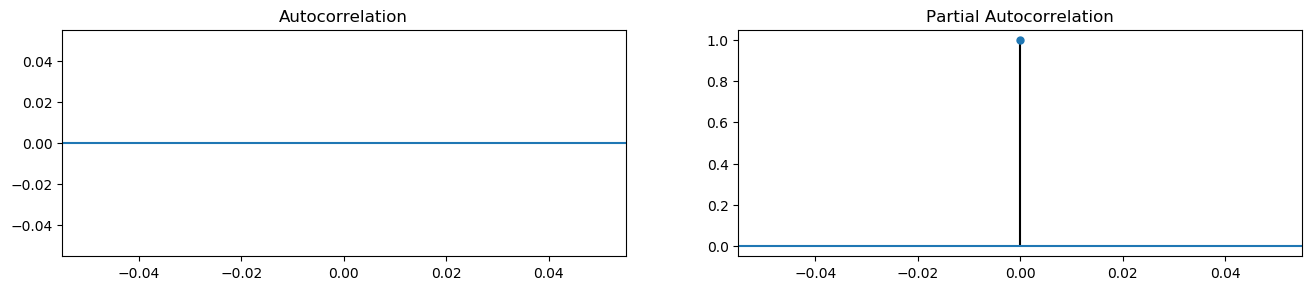

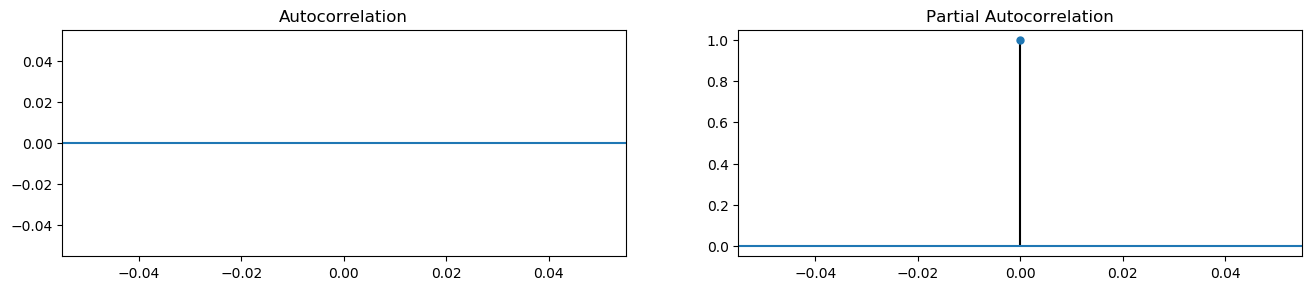

In [25]:
# PACF plot of 1st differenced series

list_consump = trend["Consumption(Bscf)"].diff().tolist()
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(list_consump, lags=50, ax=axes[0])
plot_pacf(list_consump, lags=50, ax=axes[1])

In [26]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
# data = residual["Consumption(Bscf)"]
data = df_demand["Consumption(Bscf)"]

model = ARIMA(data, order=(1,0,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency -1MS will be used.
  % freq, ValueWarning)
C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


                              ARMA Model Results                              
Dep. Variable:      Consumption(Bscf)   No. Observations:                  220
Model:                     ARMA(1, 1)   Log Likelihood               -1525.344
Method:                       css-mle   S.D. of innovations            247.504
Date:                Sat, 20 Jul 2019   AIC                           3058.687
Time:                        10:46:59   BIC                           3072.262
Sample:                    04-01-2019   HQIC                          3064.169
                         - 01-01-2001                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    2064.8859     71.016     29.076      0.000    1925.697    2204.075
ar.L1.Consumption(Bscf)     0.6628      0.057     11.706      0.000       0.552       0.774


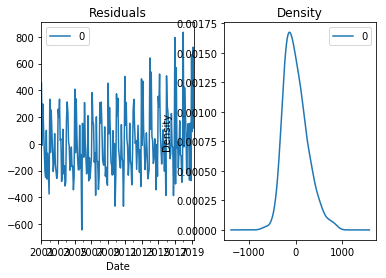

In [27]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


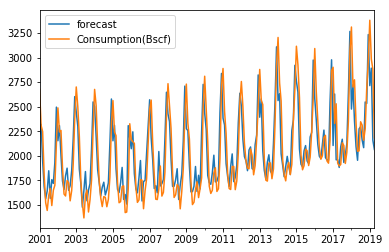

In [28]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [29]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

data = df_demand["Consumption(Bscf)"]

model = pm.auto_arima(data, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Fit ARIMA: order=(1, 0, 1); AIC=3058.687, BIC=3072.262, Fit time=0.576 seconds
Fit ARIMA: order=(0, 0, 0); AIC=3308.495, BIC=3315.283, Fit time=0.006 seconds
Fit ARIMA: order=(1, 0, 0); AIC=3102.096, BIC=3112.277, Fit time=0.095 seconds
Fit ARIMA: order=(0, 0, 1); AIC=3137.568, BIC=3147.749, Fit time=0.125 seconds
Fit ARIMA: order=(2, 0, 1); AIC=3032.207, BIC=3049.175, Fit time=0.280 seconds
Fit ARIMA: order=(2, 0, 0); AIC=3031.317, BIC=3044.891, Fit time=0.355 seconds
Fit ARIMA: order=(3, 0, 1); AIC=3032.596, BIC=3052.957, Fit time=0.360 seconds
Fit ARIMA: order=(3, 0, 0); AIC=3031.755, BIC=3048.723, Fit time=0.216 seconds
Total fit time: 2.028 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                  220
Model:                     ARMA(2, 0)   Log Likelihood               -1511.658
Method:                       css-mle   S.D. of innovations            232.410
Date:                S

C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:336: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  freq=base_index.freq)


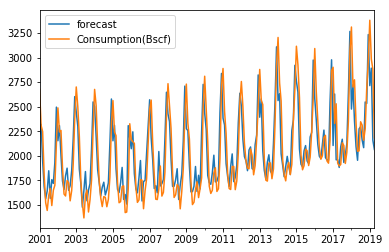

In [30]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\Asterion\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:191: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  start=index[0], end=index[-1], freq=freq)


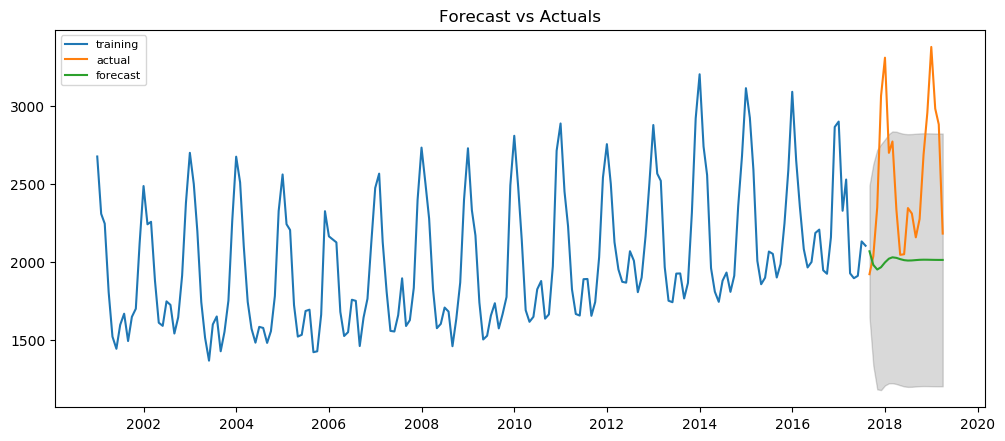

In [31]:
# Create Training and Test
dff = df_demand.sort_index(ascending=1)
train = dff["Consumption(Bscf)"][:200]
test = dff["Consumption(Bscf)"][200:]

# Build Model
model = ARIMA(train, order=(2, 0, 2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(20, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [32]:
# Seasonal - fit stepwise auto-ARIMA
data = train
smodel = pm.auto_arima(data, start_p=1, start_q=1,
                         test='adf',
                         max_p=3, max_q=3, m=12,
                         start_P=0, seasonal=True,
                         d=None, D=1, trace=True,
                         error_action='ignore',  
                         suppress_warnings=True, 
                         stepwise=True)

smodel.summary()

Fit ARIMA: order=(1, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=2297.700, BIC=2313.882, Fit time=3.096 seconds
Fit ARIMA: order=(0, 0, 0) seasonal_order=(0, 1, 0, 12); AIC=2379.576, BIC=2386.049, Fit time=0.057 seconds
Fit ARIMA: order=(1, 0, 0) seasonal_order=(1, 1, 0, 12); AIC=2334.222, BIC=2347.168, Fit time=1.325 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(0, 1, 1, 12); AIC=2309.762, BIC=2322.708, Fit time=2.298 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 1, 12); AIC=2296.611, BIC=2316.030, Fit time=2.485 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 0, 12); AIC=2336.237, BIC=2352.419, Fit time=1.087 seconds
Fit ARIMA: order=(1, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=2295.031, BIC=2317.686, Fit time=8.367 seconds
Fit ARIMA: order=(0, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=2302.321, BIC=2321.739, Fit time=6.302 seconds
Fit ARIMA: order=(2, 0, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 0, 0) seasonal_orde

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  200
Model:             SARIMAX(1, 0, 0)x(0, 1, 2, 12)   Log Likelihood               -1141.603
Date:                            Sat, 20 Jul 2019   AIC                           2293.206
Time:                                    10:47:59   BIC                           2309.388
Sample:                                         0   HQIC                          2299.762
                                            - 200                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     15.6695      2.584      6.065      0.000      10.605      20.734
ar.L1          0.4865      0.064      7.546      0.000       0.360       0.613
ma.S.L12      -0.7162      0.924     -0.775      0.438      -2.528       1.096
ma.S.L24      -0.2739      0.318     -0.860      0.390      -0.898       0.350
sigma2      9546.8835   8998.758      1.061      0.289   -8090.358    2.72e+04
===================================================================================
Ljung-Box (Q):                       61.38   Jarque-Bera (JB):                41.43
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               1.12   Skew:                            -0.46
Prob(H) (two-sided):                  0.67   Kurtosis:                         5.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

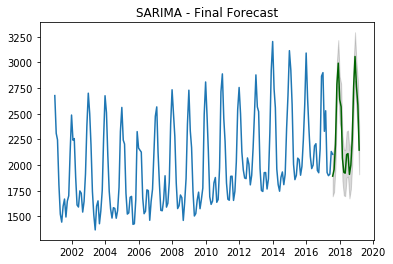

In [34]:
# Forecast
n_periods = 20
fitted, confint = smodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(train.index[-1], periods = n_periods, freq='MS')

# make series for plotting purpose
fitted_series = pd.Series(fitted, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(data)
# plt.plot(dff)
plt.plot(fitted_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("SARIMA - Final Forecast")
plt.show()

In [ ]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(data,trend='n', order=(1,0,0), seasonal_order=(1,1,1,12))
model_fit = model.fit(disp=0)
print(model_fit.summary())

In [ ]:
dff = df_demand.sort_index(ascending=1)

In [ ]:
dff["Consumption(Bscf)"][:180]

In [ ]:
df_demand["Consumption(Bscf)"][0:50]

In [ ]:
df_ng_demand_res = pd.read_csv("../../Data/CSV_Files/Gas_Demand_Ind.csv", encoding='utf-8')
df_ng_demand_res = df_ng_demand_res.drop(['Unnamed: 0'], axis=1)
df_ng_demand_res["Date"] = pd.to_datetime(df_ng_demand_res["Date"])
# df_ng_demand_res = df_ng_demand_res.set_index("Date")
df_ng_demand_res

In [ ]:
df_ng_price_res = pd.read_csv("../../Data/CSV_Files/Gas_Price_Ind.csv", encoding='utf-8')
df_ng_price_res = df_ng_price_res.drop(['Unnamed: 0'], axis=1)
df_ng_price_res["Date"] = pd.to_datetime(df_ng_price_res["Date"])
# df_ng_price_res = df_ng_price_res.set_index("Date")
df_ng_price_res

In [ ]:
df = pd.merge(df_ng_demand_res,df_ng_price_res, on = ["Date","Area"], how = "left")
df.loc[df["Price"].isna()]

In [ ]:
df.loc[(df["Area"]=="Wyoming") & (df["Date"].dt.year==1995)]

In [ ]:
df_ng_price_res[(df_ng_price_res["Area"]=="Wyoming") & (df_ng_price_res["Date"].dt.year==1995)]

In [ ]:
df_ng_price_res[(df_ng_price_res["Area"]=="U.S.") & (df_ng_price_res["Date"].dt.year==1980)]

In [ ]:
df_ng_price_res_US = df_ng_price_res[(df_ng_price_res["Area"]=="U.S.") & (df_ng_price_res["Date"].dt.year >= 1990)]
plt.plot(df_ng_price_res_US["Date"],df_ng_price_res_US["Price"],c="b")

In [ ]:
df_ng_demand_res_US = df_ng_demand_res[(df_ng_demand_res["Area"]=="U.S.") & (df_ng_demand_res["Date"].dt.year >= 1990)]
# plt.plot(df_ng_demand_res_US["Date"],df_ng_demand_res_US["Residential"],c="b")
plt.plot(df_ng_demand_res_US["Date"],df_ng_demand_res_US["Industrial"],c="b")
df_ng_demand_res_US["Year"] = df_ng_demand_res_US["Date"].dt.year
fig, axes = plt.subplots(1, 1, figsize=(20,7), dpi= 80)
# sns.boxplot(x='Year', y='Residential', data=df_ng_demand_res_US)
sns.boxplot(x='Year', y='Industrial', data=df_ng_demand_res_US)

In [ ]:
corr = df.corr()
plt.figure(figsize=(16,14))
sns.heatmap(corr[(corr >= 0.01) | (corr <= -0.01)],
           cmap="viridis",vmax=1.0, vmin=-1.0, linewidths=0.1,
           annot=True,annot_kws={"size":9},square=True)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
df_ng_demand_res_US = df_ng_demand_res_US.set_index("Date")

# decomposition = seasonal_decompose(df_ng_demand_res_US["Residential"], model = "multiplicative")
decomposition = seasonal_decompose(df_ng_demand_res_US["Industrial"], model = "multiplicative")

decomposition.plot()

In [ ]:
# decomposition = seasonal_decompose(df_ng_demand_res_US["Residential"], model = "additive")
decomposition = seasonal_decompose(df_ng_demand_res_US["Industrial"], model = "additive")

decomposition.plot()

In [ ]:
trend = pd.DataFrame(decomposition.trend)
trend = trend.dropna()
seasonal = pd.DataFrame(decomposition.seasonal)
seasonal = seasonal.dropna()
residual = pd.DataFrame(decomposition.resid)
residual = residual.dropna()

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Test
# result = adfuller(df_ng_demand_res_US["Residential"], autolag='AIC')
result = adfuller(df_ng_demand_res_US["Industrial"], autolag='AIC')
# result = adfuller(residual["Residential"], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

if result[1] <= 0.05:
    print("The null hypothesis is that the time series is non-stationary. Since p <= 0.05, we reject the null hypotesis")
else:
    print("The null hypothesis is that the time series is non-stationary. Since p > 0.05, we CAN NOT REJECT the null hypotesis")

for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    
    
# KPSS Test
# result = kpss(df_ng_demand_res_US["Residential"], regression='c')
result = kpss(df_ng_demand_res_US["Industrial"], regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])

if result[1] <= 0.05:
    print("The null hypothesis is that the time series is stationary. Since p <= 0.05, we reject the null hypotesis")
else:
    print("The null hypothesis is that the time series is stationary. Since p > 0.05, we CAN NOT REJECT the null hypotesis")

for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    


In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)

# plot_acf(df_ng_demand_res_US["Residential"].tolist(), lags=50, ax=axes[0])
# plot_pacf(df_ng_demand_res_US["Residential"].tolist(), lags=50, ax=axes[1])

# plot_acf(residual["Residential"].tolist(), lags=50, ax=axes[0])
# plot_pacf(residual["Residential"].tolist(), lags=50, ax=axes[1])

plot_acf(residual["Industrial"].tolist(), lags=50, ax=axes[0])
plot_pacf(residual["Industrial"].tolist(), lags=50, ax=axes[1])